# Табличная классификация с набором данных об увольнении сотрудников

Ссылка на конкурс: 

https://www.kaggle.com/competitions/playground-series-s3e3

## Импортирование библиотек.

In [ ]:
import pandas as pd
import numpy as np
import shap
import catboost
from catboost import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Испортирование данных.

**Описание полей.**

1. Age  - возраст,
2. BusinessTravel - деловые поездки,
3. DailyRate - дневная ставка, 
4. Department - отдел, 
5. DistanceFromHome - расстояние от дома,
6. Education - образование, 
7. EducationField - сфера образования, 
8. EmployeeCount - количество сотрудников,
9. EnvironmentSatisfaction - удовлетворенность окружающей средой, 
10. Gender - пол, 
11. HourlyRate - почасовая ставка, 
12. JobInvolvement - вовлеченность в работу,
13. JobLevel - уровень работы, 
14. JobRole - должность, 
15. JobSatisfaction - удовлетворенность работой, 
16. MaritalStatus - семейное положение,
17. MonthlyIncome - ежемесячный доход, 
18. MonthlyRate - ежемесячная ставка, 
19. NumCompaniesWorked - количество работающих компаний, 
20. Over18 - старше 18,
21. OverTime - переработка, 
22. PercentSalaryHike - процентное повышение зарплаты, 
23. PerformanceRating - рейтинг эффективности,
24. RelationshipSatisfaction - удовлетворенность отношениями, 
25. StandardHours - стандартные часы, 
26. StockOptionLevel - уровень опционов на акции,
27. TotalWorkingYears - общий рабочий стаж, 
28. TrainingTimesLastYear - время обучения в прошлом году, 
29. WorkLifeBalance - баланс трудовой жизни,
30. YearsAtCompany - годы работы в компании, 
31. YearsInCurrentRole - годы в текущей должности, 
32. YearsSinceLastPromotion - годы с момента последнего повышения,
33. YearsWithCurrManager - годы работы с текущим руководителем, 
34. Attrition - было ли увольнение.

In [ ]:
train_data = pd.read_csv('C:/Users/natal/Favorites/Kaggle/playground_series/train.csv',  index_col = 'id')
train_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,,,,,,,,,,,,,,,,,,,,,
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,80,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,80,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,80,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,80,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,80,0,31,0,3,31,14,4,10,1


In [ ]:
test_data = pd.read_csv('C:/Users/natal/Favorites/Kaggle/playground_series/test.csv', index_col = 'id')
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,...,4,80,0,1,2,2,1,0,0,0
1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,...,3,80,1,7,3,3,2,2,2,2
1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,...,2,80,2,13,2,2,7,7,1,7
1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,...,3,80,0,14,2,2,14,10,11,8
1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,...,1,80,0,1,5,3,1,0,0,0


In [ ]:
train_data.shape, test_data.shape

((1677, 34), (1119, 33))

## Предварительная подготовка данных

Все изменения должны быть выполненны для тренировочного и тестового датасетов.

In [ ]:
all_data = pd.concat((train_data.drop(columns='Attrition'), test_data))
all_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,2,80,1,10,2,3,10,0,7,8
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,4,80,1,4,3,3,4,2,0,3
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,4,80,2,4,3,3,3,2,1,2
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,3,80,0,15,1,1,6,0,0,2
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,3,80,0,31,0,3,31,14,4,10


**Пропущенные значения.**

In [ ]:
for col, per in zip(all_data.columns, all_data.isnull().mean() *100):
    if per > 0:
        print(col, per)

Хорошие новости: в датасете отсутствуют пропущенныве значения!

**Неинформативные данные.**

In [ ]:
drop_cols = []
for col in all_data.columns:
    if all_data[col].nunique() <= 1:
        print(col, all_data[col].unique())
        drop_cols.append(col)

EmployeeCount [1]
Over18 ['Y']
StandardHours [80]


Удалим неинформативные данные.

In [ ]:
all_data = all_data.drop(columns = drop_cols)

Разбиваем обратно на 2 датасета.

In [ ]:
train = all_data[:train_data.shape[0]]
test = all_data[train_data.shape[0]:]
train.insert(0, 'Attrition', train_data.Attrition.values.tolist()) 

In [ ]:
train.shape, test.shape

((1677, 31), (1119, 30))

## Exploratory data analysis

### Attrition

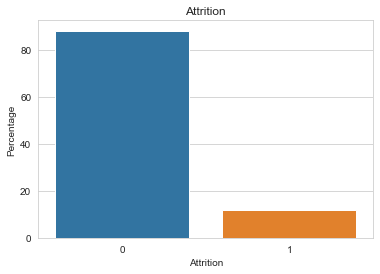

In [ ]:
# Нормирование на размер датасета
att = (train.Attrition.value_counts(normalize=True)
                     .mul(100)
                     .rename('percentage')
                     .reset_index())

ax = sns.barplot(x='index', y='percentage', data=att)
plt.title('Attrition')
plt.xlabel('Attrition')
plt.ylabel('Percentage');

Виден дисбаланс классов, при обучении модели это стоит учитывать.

### **Гипотезы:**
1. Более молодые люди увольняются чаще.
2. Cотрудники, которые ездят в командировки (BusinessTravel), увольняются чаще. 
3. Сотрудники, неудовлетворённые окружающей средой (EnvironmentSatisfaction), увольняются чаще.
4. Сотрудники с маленькой пачасовой ставкой(HourlyRate) увольняются чаще.
5. Сотрудники, не вовлеченные в работу, увольняются чаще.
6. Одинокие сотрудники увольняются чаще.
7. Сотрудники с маленьким ежемесячным доходом (MonthlyIncome) увольняются чаще.
8. Сотрудники, которые перерабатывают (OverTime), увольняются чаще.
9. Чем выше удовлетворенность отношениями (RelationshipSatisfaction), тем меньше вероятность увольнения.
10. Сотрудники с мешьми стажем работы (TotalWorkingYears) увольняются чаще.
11. Чем дольше человек работает в компании (YearsAtCompany), тем с меньшей вероятностью он уволится.
12. Чем дольше человек работает на одной должности (YearsInCurrentRole), тем с меньшей вероятностью он уволится.
13. Чем дольше человек работает с одним руководителем (YearsWithCurrManager), тем с меньшей вероятностью он уволится.

### **Age**

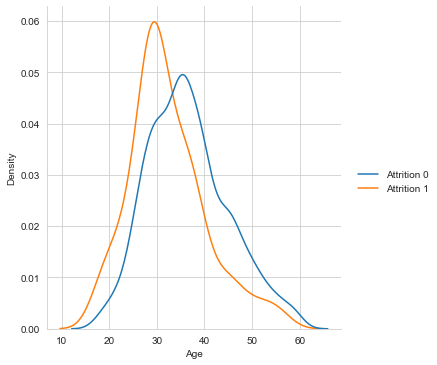

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].Age,
        "Attrition 1": train[train.Attrition == 1].Age
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)
plt.xlabel('Age');

Гипотеза №1 подтвердилась.

### **BusinessTravel**

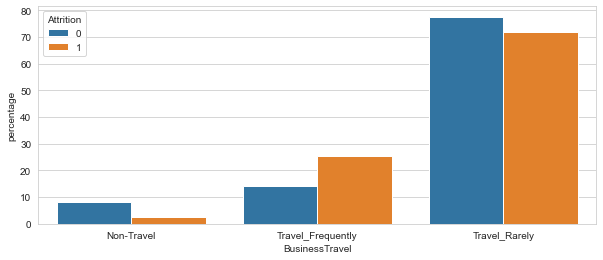

In [ ]:
plt.figure(figsize=(10,4))
travel_att = (train.groupby(['Attrition']).BusinessTravel
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('BusinessTravel'))

ax = sns.barplot(x="BusinessTravel", y="percentage", hue="Attrition", data=travel_att)

In [ ]:
# Процент уволенных
train.groupby('BusinessTravel').Attrition.mean().mul(100)

BusinessTravel
Non-Travel            3.968254
Travel_Frequently    19.540230
Travel_Rarely        11.162791
Name: Attrition, dtype: float64

In [ ]:
train.MaritalStatus.value_counts()

Married     773
Single      577
Divorced    327
Name: MaritalStatus, dtype: int64

Гипотеза №2 подтвердилась.

### **DailyRate**

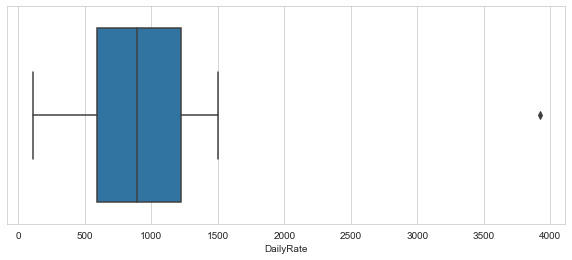

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x = train.DailyRate);

Есть значительный выброс. Удалим запись содержащую его.

In [ ]:
train = train[train.DailyRate <= 2000]

### **Education**

In [ ]:
train.Education.value_counts()

3     681
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64

In [ ]:
train = train[train.Education != 15]

### **EnvironmentSatisfaction**

In [ ]:
train.EnvironmentSatisfaction.unique()

array([4, 1, 3, 2], dtype=int64)

In [ ]:
test.EnvironmentSatisfaction.unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [ ]:
test.loc[test.EnvironmentSatisfaction == 0, 'EnvironmentSatisfaction'] = test.EnvironmentSatisfaction.mode()[0]

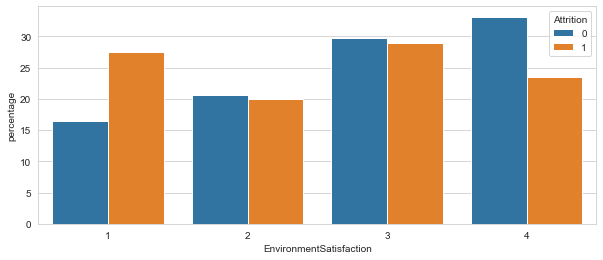

In [ ]:
plt.figure(figsize=(10,4))
env_sat_att = (train.groupby(['Attrition']).EnvironmentSatisfaction
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('EnvironmentSatisfaction'))

ax = sns.barplot(x="EnvironmentSatisfaction", y="percentage", hue="Attrition", data=env_sat_att)

In [ ]:
# Процент уволенных
train.groupby('EnvironmentSatisfaction').Attrition.mean().mul(100)

EnvironmentSatisfaction
1    18.456376
2    11.594203
3    11.693548
4     8.768657
Name: Attrition, dtype: float64

Гипотеза №3 подтвердилась.

### **HourlyRate**

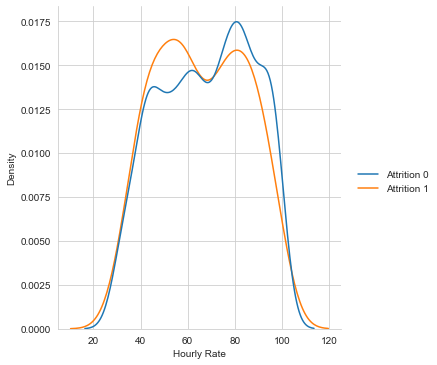

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].HourlyRate,
        "Attrition 1": train[train.Attrition == 1].HourlyRate
    },
    kind="kde",
    common_norm=False 
)
plt.xlabel('Hourly Rate');

Гипотеза №4 подтвердилась.

### **JobInvolvement**

In [ ]:
train.JobInvolvement.value_counts()

3    1106
2     358
4     139
1      72
Name: JobInvolvement, dtype: int64

In [ ]:
test.JobInvolvement.value_counts()

3    699
2    291
4     87
1     41
0      1
Name: JobInvolvement, dtype: int64

In [ ]:
test.loc[test.JobInvolvement == 0, 'JobInvolvement'] = test.JobInvolvement.mode()[0]

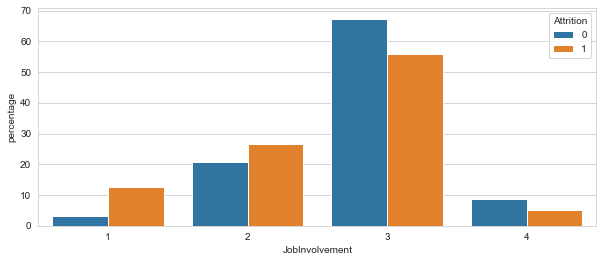

In [ ]:
plt.figure(figsize=(10,4))
job_inv_att = (train.groupby(['Attrition']).JobInvolvement
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('JobInvolvement'))

ax = sns.barplot(x="JobInvolvement", y="percentage", hue="Attrition", data=job_inv_att)

In [ ]:
train.groupby('JobInvolvement').Attrition.mean().mul(100)

JobInvolvement
1    34.722222
2    14.804469
3    10.126582
4     7.194245
Name: Attrition, dtype: float64

Гипотеза №5 подтвердилась.

### **JobLevel**

In [ ]:
train.JobLevel.unique()

array([1, 2, 5, 3, 4, 7], dtype=int64)

In [ ]:
test.JobLevel.unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [ ]:
train.loc[train.JobLevel == 7, 'JobLevel'] = train.JobLevel.mode()[0]

### **MaritalStatus**

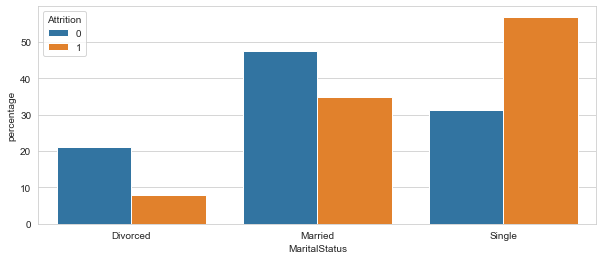

In [ ]:
plt.figure(figsize=(10,4))
mar_stat_att = (train.groupby(['Attrition']).MaritalStatus
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('MaritalStatus'))

ax = sns.barplot(x="MaritalStatus", y="percentage", hue="Attrition", data=mar_stat_att)

Гипотеза №6 подтвердилась.

### **MonthlyIncome**

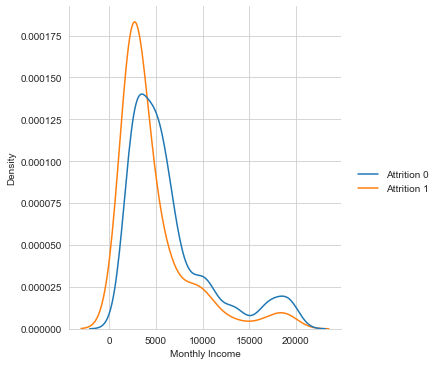

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].MonthlyIncome,
        "Attrition 1": train[train.Attrition == 1].MonthlyIncome
    },
    kind="kde",
    common_norm=False 
)
plt.xlabel('Monthly Income');

Гипотеза №7 подтвердилась.

### **NumCompaniesWorked**

In [ ]:
sorted(train.NumCompaniesWorked.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
sorted(test.NumCompaniesWorked.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 17]

In [ ]:
test.loc[test.NumCompaniesWorked == 17, 'NumCompaniesWorked'] = test.NumCompaniesWorked.mode()[0]

### OverTime

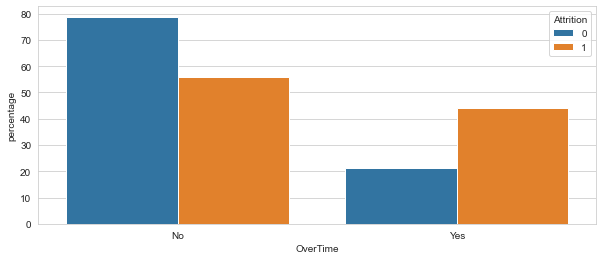

In [ ]:
plt.figure(figsize=(10,4))
over_time_att = (train.groupby(['Attrition']).OverTime
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('OverTime'))

ax = sns.barplot(x="OverTime", y="percentage", hue="Attrition", data=over_time_att)

Гипотеза №8 подтвердилась.

### RelationshipSatisfaction

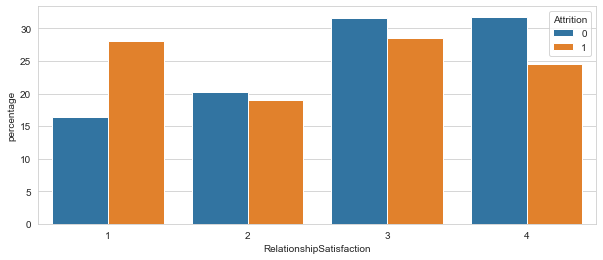

In [ ]:
plt.figure(figsize=(10,4))
rel_sat_att = (train.groupby(['Attrition']).RelationshipSatisfaction 
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('RelationshipSatisfaction'))

ax = sns.barplot(x="RelationshipSatisfaction", y="percentage", hue="Attrition", data=rel_sat_att)

Гипотеза №9 подтвердилась.

### StockOptionLevel

In [ ]:
sorted(train.StockOptionLevel.unique()), sorted(test.StockOptionLevel.unique())

([0, 1, 2, 3], [0, 1, 2, 3, 4])

In [ ]:
test.loc[test.StockOptionLevel == 4, 'StockOptionLevel'] = test.StockOptionLevel.mode()[0]

### TotalWorkingYears

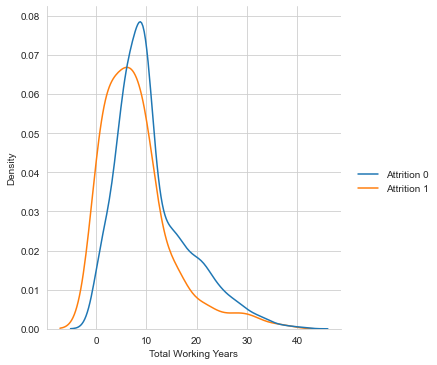

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].TotalWorkingYears,
        "Attrition 1": train[train.Attrition == 1].TotalWorkingYears
    },
    kind="kde",
    common_norm=False 
)
plt.xlabel('Total Working Years');

Гипотеза №10 подтвердилась.

### YearsAtCompany

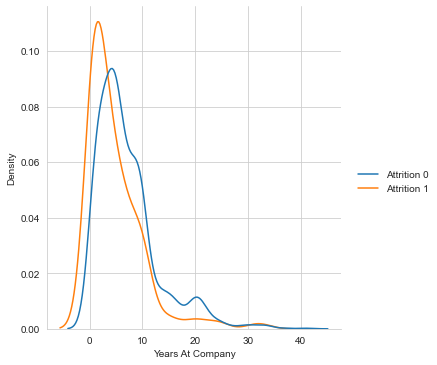

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].YearsAtCompany,
        "Attrition 1": train[train.Attrition == 1].YearsAtCompany
    },
    kind="kde",
    common_norm=False 
)
plt.xlabel('Years At Company');

Гипотеза №11 подтвердилась.

### YearsInCurrentRole

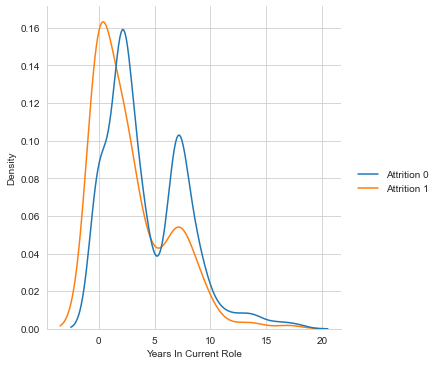

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].YearsInCurrentRole,
        "Attrition 1": train[train.Attrition == 1].YearsInCurrentRole
    },
    kind="kde",
    common_norm=False 
)
plt.xlabel('Years In Current Role');

Гипотеза №12 подтвердилась.

### YearsWithCurrManager

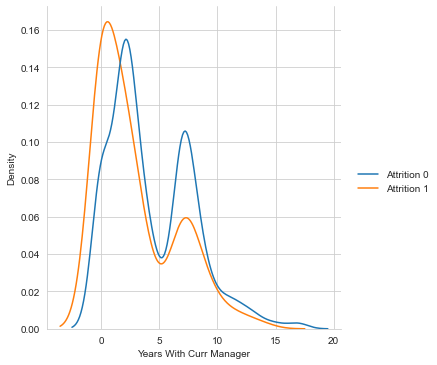

In [ ]:
sns.displot(
    {
        "Attrition 0": train[train.Attrition == 0].YearsWithCurrManager,
        "Attrition 1": train[train.Attrition == 1].YearsWithCurrManager
    },
    kind="kde",
    common_norm=False 
)
plt.xlabel('Years With Curr Manager');

Гипотеза №13 подтвердилась.

### Матрица корреляции.

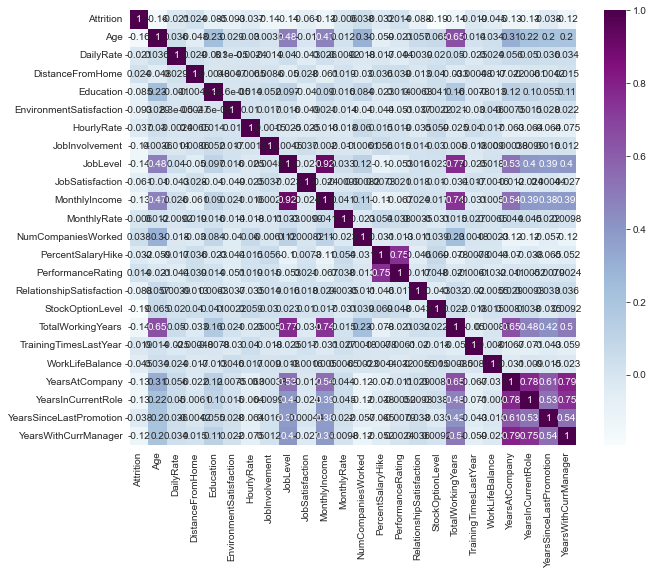

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(method='pearson', numeric_only=True), annot=True, cmap="BuPu");

## Feature engineering

In [ ]:
all_data = pd.concat((train.drop(columns='Attrition'), test))
target = train.Attrition

In [ ]:
num_cols = []
for col in all_data.columns:
    if all_data[col].dtype != object:
        num_cols.append(col)

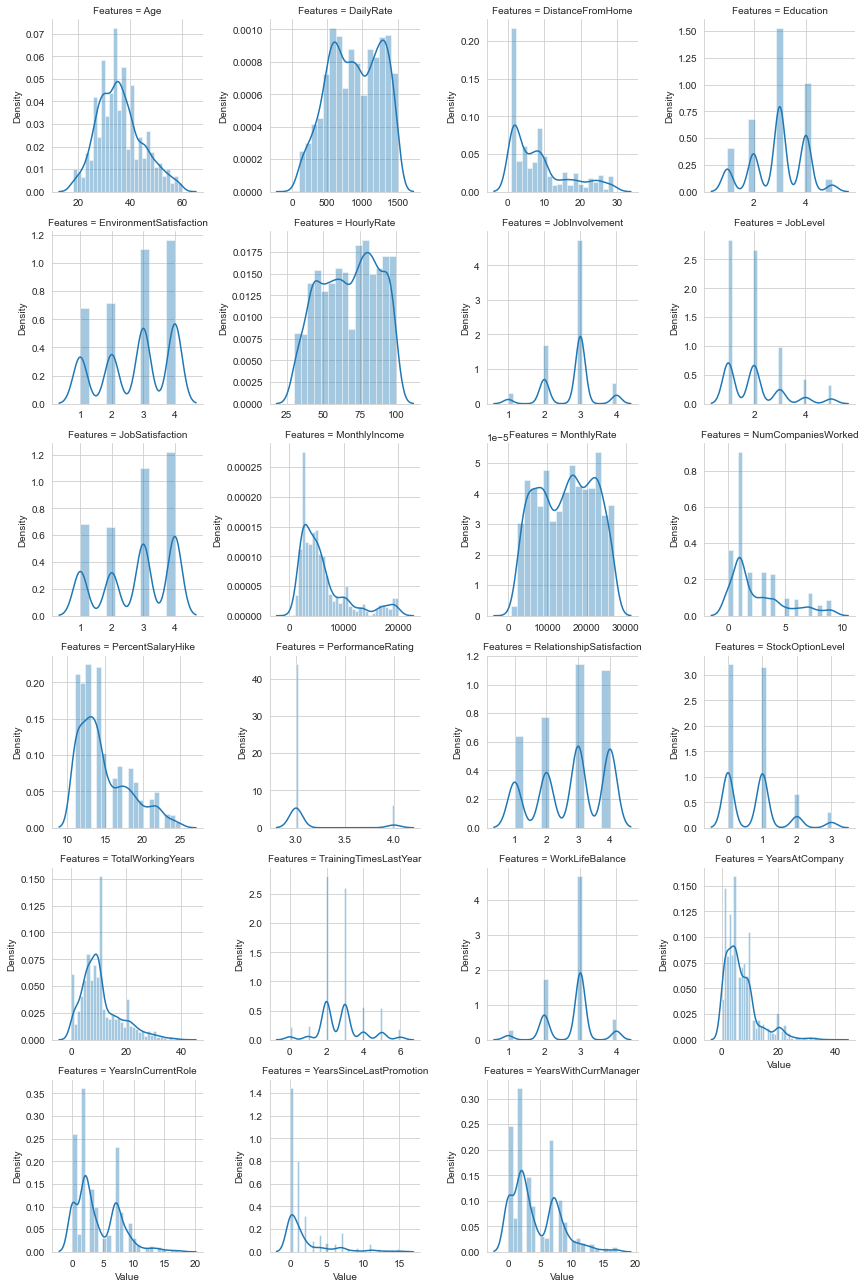

In [ ]:
numeric_features = all_data[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=4, sharex=False, sharey=False)

ax = ax.map(sns.distplot, "Value");

In [ ]:
log_cols = ['DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears',\
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for col in log_cols:
    all_data.loc[:, col] = np.log(all_data[col]+1)

Новый признак семейные сотрудники, которые ездят в командировки.

In [ ]:
all_data['MarriedAndTravel'] = np.where((all_data.BusinessTravel == 'Travel_Frequently')&\
                                        (all_data.MaritalStatus == 'Married'), 1, 0)

Новый признак уровень переработки в зависимости от отдела.

In [ ]:
all_data.OverTime = np.where((all_data.OverTime == 'Yes'), 1, 0)
all_data['MeanOverTimeDepart'] = all_data['Department'].map(all_data.groupby('Department').OverTime.mean().to_dict())

Новый признак средняя зарплата в зависимости от отдела.

In [ ]:
all_data['MeanMonthlyIncomeDepart'] = all_data['Department'].map(all_data.groupby('Department').\
                                                                 MonthlyIncome.mean().to_dict())

Новый признак разница между ставкой и доходом.

In [ ]:
all_data['MonthlyIncome_MonthlyRate'] = all_data.MonthlyIncome - all_data.MonthlyRate

**Категориальные признаки.**

In [ ]:
all_data.loc[all_data.BusinessTravel == 'Non-Travel',  'BusinessTravel'] = 0
all_data.loc[all_data.BusinessTravel == 'Travel_Rarely',  'BusinessTravel'] = 1
all_data.loc[all_data.BusinessTravel == 'Travel_Frequently',  'BusinessTravel'] = 2

In [ ]:
all_data.BusinessTravel = all_data.BusinessTravel.astype(int)

In [ ]:
cat_cols = []
for col in all_data.columns:
    if all_data[col].dtype == object:
        cat_cols.append(col)
cat_cols

['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

In [ ]:
all_data = pd.get_dummies(all_data, columns=cat_cols, drop_first=True)

Разбиваем данные обратно.

In [ ]:
train = all_data[:target.shape[0]]
test = all_data[target.shape[0]:]

## Моделирование

In [ ]:
X = train
y = target
X_test = test

**CatBoost**

In [ ]:
CV_model = GridSearchCV(estimator=catboost.CatBoostClassifier(scale_pos_weight=7, random_state=2023),                        
                            param_grid={'depth':[3, 7],
                                        'learning_rate':[0.01, 0.1, 0.2, 0.25],
                                        'iterations':[200, 300, 500, 1000],
                                        'l2_leaf_reg':[0.1, 1, 2, 10]
                                        },
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1)
#CV_model.fit(X, y)

In [ ]:
#print('CV_model.best_params_')

depth=3, iterations=500, l2_leaf_reg=10, learning_rate= 0.01


In [ ]:
model = catboost.CatBoostClassifier(depth=3, iterations=500, l2_leaf_reg=10, 
                                    learning_rate= 0.01, scale_pos_weight=7, random_state=2023)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % scores.mean())

Mean ROC AUC: 0.83369


## Анализ важных признаков (shap)

### **Подбор параметров**

In [ ]:
model = catboost.CatBoostClassifier(depth=3, iterations=500, l2_leaf_reg=10, 
                                    learning_rate= 0.01, scale_pos_weight=7, random_state=2023)
model.fit(X, y, verbose=False, plot=False)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y))

In [ ]:
feature_names = X.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [ ]:
shap_importance

,col_name,feature_importance_vals
17,StockOptionLevel,0.564331
13,OverTime,0.261310
0,Age,0.180265
10,MonthlyIncome,0.176112
8,JobLevel,0.140397
12,NumCompaniesWorked,0.113640
1,BusinessTravel,0.094330
16,RelationshipSatisfaction,0.093466
21,YearsAtCompany,0.093304
7,JobInvolvement,0.086890


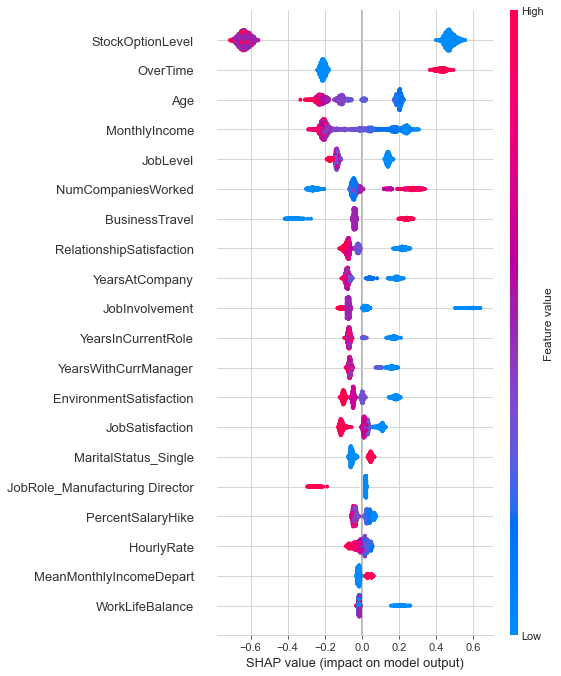

In [ ]:
# summary plot
shap.summary_plot(shap_values, X)

Данные представлены в порядке важности.

In [ ]:
imp_cols = shap_importance[shap_importance.feature_importance_vals >=0.01].col_name.tolist()

In [ ]:
X = train[imp_cols]

In [ ]:
model = catboost.CatBoostClassifier(depth=3, iterations=500, l2_leaf_reg=10, 
                                    learning_rate= 0.01, scale_pos_weight=7, random_state=2023)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % scores.mean())

Mean ROC AUC: 0.83681


## Предсказания

In [ ]:
X = train[imp_cols]
X_test = test[imp_cols]

In [ ]:
model = catboost.CatBoostClassifier(depth=3, iterations=500, l2_leaf_reg=10, 
                                    learning_rate= 0.01, scale_pos_weight=7, random_state=2023)
model.fit(X, y, verbose=False, plot=False)
y_pred = model.predict_proba(X_test)[:,1]

In [ ]:
submission = pd.read_csv('C:/Users/natal/Favorites/Kaggle/playground_series/sample_submission.csv', index_col = 'id')

In [ ]:
submission['Attrition'] = y_pred
submission.to_csv('C:/Users/natal/Downloads/my_submission.csv')

## Результат

My private Score = 0.8702

Best private Score = 0.90185